In [ ]:
!sudo apt-get install msttcorefonts -qq

In [ ]:
from google.colab import drive
drive.mount('/drive')

from csv import reader
import pandas as pd
import ast

Mounted at /drive


In [ ]:
test = pd.read_csv('http://sybmo.com/thesis/test.csv')
test.tokens = test.tokens.apply(ast.literal_eval)
test.labels = test.labels.apply(ast.literal_eval)


final_list_tokens = []
final_list_labels = []

with open("/drive/My Drive/thesis_sybren/BERTs/DistilBERT/toxicBERT-params.csv", "r") as read_obj:
    csv_reader = reader(read_obj)
    # iterate over each row in the csv using reader object
    breaki = 0
    for row in csv_reader:
        #print(row)
        # declare emtpy lists for every row
        words = []
        labels = []
        # row variable is a list that represents a row in csv
        for element in row:
            # turn string representation of tuple into real tuple
            element = ast.literal_eval(str(element))
            # append every first element of tuple to words list
            words.append(element[0])

            # check if words start with bracket or double hashtag in order to only keep the right labels
            if not (element[0].startswith("[C") or element[0].startswith("##") or element[0].startswith("[S") ):
                labels.append(element[1])

        #remove "tokens" that start with bracket ([CLS] and [SEP] (but keep [UNK]))
        text = ' '.join([x for x in words if not (x.startswith('[C') or x.startswith('[S'))])
        #print('textje', text)

        clean_text = text.replace(' ##', '')
        #print(clean_text)


        split_fine_text = clean_text.split()
        #print(split_fine_text)

        # this piece of code finds emojis and removes them from the list
        # and removes the labels at given index
        tellertje = 0
        for index, token in enumerate(split_fine_text):
            encoded_token = token.encode('utf8')
            if 'xf' in str(encoded_token):
                tellertje += 1
                split_fine_text.pop(index)
                labels.pop(index)

        final_list_tokens.append(split_fine_text)
        final_list_labels.append([int(x[-1]) for x in labels])

        # breaki+=1
        # #if breaki > 10:
        #  #   break


# flatten the lists
preds = [item for sublist in final_list_labels for item in sublist]
gold = [item for sublist in test.labels.to_list() for item in sublist]
tokens_gold = [item for sublist in test.tokens.to_list() for item in sublist]
reconstructed_flat = [item for sublist in final_list_tokens for item in sublist]
print(tellertje)

0


In [ ]:
len(reconstructed_flat)

14205

In [ ]:
for index,token in enumerate(tokens_gold):
    if token == "\u200d":
        print(token)
        gold.pop(index)
        tokens_gold.pop(index)

print(len(tokens_gold),len(reconstructed_flat),len(gold),len(preds))



‍
14205 14205 14205 14205


In [ ]:
# pos_errors_in_span

In [ ]:
tokens_errors = []

for index, label in enumerate(gold):
    if gold[index] != preds[index]:
        #print(gold[index],preds[index])
        tokens_errors.append(tokens_gold[index])

df_tokens_error = pd.DataFrame(tokens_errors)
#df_tokens_error[0].value_counts()

df_tokens_error

,0
0,ass
1,hoes
2,loser
3,bullshit
4,ghetto
...,...
995,you
996,spic
997,kid
998,stormer


In [ ]:
tokens_errors_inspan_gold = []

for index, label in enumerate(gold):
    if gold[index] != preds[index]:
        if gold[index] != 0:
            #print(gold[index],preds[index])
            tokens_errors_inspan_gold.append(tokens_gold[index])

# df_tokens_error = pd.DataFrame(tokens_errors_inspan_gold)
pos_tags_errors_inspan_golds_gold = [duo[1] for duo in nltk.pos_tag(tokens_errors_inspan_gold)]

pos_tags_errors_inspan_golds_gold


normalized_count = pd.Series(pos_tags_errors_inspan_golds_gold).value_counts(normalize=False)
normalized_count

NN      130
NNS      90
JJ       81
PRP      63
VBP      54
VBD      22
PRP$     18
DT       13
VBG      12
VB       12
VBZ      10
IN        6
RB        4
RBR       3
CC        2
VBN       2
FW        2
JJR       2
JJS       1
WDT       1
dtype: int64

In [ ]:
tokens_errors_inspan_gold = []

for index, label in enumerate(gold):
    if gold[index] != preds[index]:
        if gold[index] == 0:
            #print(gold[index],preds[index])
            tokens_errors_inspan_gold.append(tokens_gold[index])

# df_tokens_error = pd.DataFrame(tokens_errors_inspan_gold)
pos_tags_errors_inspan_golds_gold = [duo[1] for duo in nltk.pos_tag(tokens_errors_inspan_gold)]

pos_tags_errors_inspan_golds_gold


normalized_count = pd.Series(pos_tags_errors_inspan_golds_gold).value_counts(normalize=True).round(3)
normalized_count*100

NN      27.5
JJ      21.6
NNS     12.5
VBP     11.4
PRP      9.5
VBD      3.2
NNP      2.8
PRP$     1.9
VBZ      1.9
DT       1.5
VBG      1.5
VB       1.5
IN       0.8
RB       0.8
CD       0.6
JJR      0.4
VBN      0.2
RP       0.2
dtype: float64

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')


pos_tags_gold = [duo[1] for duo in nltk.pos_tag(tokens_gold)]
tokens_errors_pos = [duo[1] for duo in nltk.pos_tag(tokens_errors)]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
len(gold)

14205

In [ ]:
len(tokens_gold)

14205

In [ ]:
incorrect_predictions_in_targetspan = tokens_errors

pos_errors_in_target_span = [duo[1] for duo in nltk.pos_tag(incorrect_predictions_in_targetspan)]




counter_in_target = pd.Series(pos_errors_in_target_span).value_counts()

display(counter_in_target)

NN      256
JJ      186
NNS     145
VBP     109
PRP     107
VBD      35
PRP$     27
VBZ      23
DT       20
VB       18
VBG      18
IN       17
NNP      13
JJR       7
RB        6
CD        3
VBN       3
WDT       2
FW        2
RBR       1
RP        1
JJS       1
dtype: int64

In [ ]:
display(df_test_gold)

,0,1
NN,2871,0
JJ,1387,0
DT,1277,0
IN,1250,0
NNS,996,0
RB,843,0
VBP,789,0
VB,749,0
PRP,743,0
VBZ,450,0


In [ ]:
# Define the broader categories
categories = {
    'Nouns': ['NN', 'NNS', 'NNP'],
    'Verbs': ['VBP', 'VBD', 'VBZ', 'VB', 'VBG', 'VBN'],
    'Adjectives': ['JJ', 'JJR', 'JJS'],
    'Pronouns': ['PRP', 'PRP$'],
    'Others': ['DT', 'IN', 'RB', 'CD', 'WDT', 'FW', 'RBR', 'RP', 'CC', 'TO', 'MD', 'WP', 'WRB']
}

# Create a new DataFrame with the broader categories
abstract_df = pd.DataFrame(index=categories.keys(), columns=['List1', 'List2', 'List3'])

for category, tags in categories.items():
    abstract_df.loc[category, 'List1'] = df.loc[df.index.intersection(tags), 'List1'].sum()
    abstract_df.loc[category, 'List2'] = df.loc[df.index.intersection(tags), 'List2'].sum()
    abstract_df.loc[category, 'List3'] = df.loc[df.index.intersection(tags), 'List3'].sum()

print(abstract_df)


NameError: ignored

In [ ]:
normalized_count = pd.Series(tokens_errors_pos).value_counts(normalize=True).round(3)
counter = pd.Series(tokens_errors_pos).value_counts()

df_test_error = pd.DataFrame([counter, normalized_count]).T.head(20)
df_test_error[0] = df_test_error[0].astype(int)
print(df_test_error[0].sum())
print(df_test_error.to_latex())

normalized_count = pd.Series(pos_tags_gold).value_counts(normalize=True).round(3)
counter = pd.Series(pos_tags_gold).value_counts()

df_test_gold = pd.DataFrame([counter, normalized_count]).T.head(20)
df_test_gold = df_test_gold.astype(int)
display(df_test_error)
display(df_test_gold)

998
\begin{tabular}{lrr}
\toprule
{} &    0 &      1 \\
\midrule
NN   &  256 &  0.256 \\
JJ   &  186 &  0.186 \\
NNS  &  145 &  0.145 \\
VBP  &  109 &  0.109 \\
PRP  &  107 &  0.107 \\
VBD  &   35 &  0.035 \\
PRP\$ &   27 &  0.027 \\
VBZ  &   23 &  0.023 \\
DT   &   20 &  0.020 \\
VB   &   18 &  0.018 \\
VBG  &   18 &  0.018 \\
IN   &   17 &  0.017 \\
NNP  &   13 &  0.013 \\
JJR  &    7 &  0.007 \\
RB   &    6 &  0.006 \\
CD   &    3 &  0.003 \\
VBN  &    3 &  0.003 \\
WDT  &    2 &  0.002 \\
FW   &    2 &  0.002 \\
RBR  &    1 &  0.001 \\
\bottomrule
\end{tabular}



<ipython-input-16-f9132298c827>:7: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(df_test_error.to_latex())


,0,1
NN,256,0.256
JJ,186,0.186
NNS,145,0.145
VBP,109,0.109
PRP,107,0.107
VBD,35,0.035
PRP$,27,0.027
VBZ,23,0.023
DT,20,0.020
VB,18,0.018


,0,1
NN,2871,0
JJ,1387,0
DT,1277,0
IN,1250,0
NNS,996,0
RB,843,0
VBP,789,0
VB,749,0
PRP,743,0
VBZ,450,0


In [ ]:
incorrect = 18
inside = 12


answer = inside/incorrect*100

rounded_answer = round(answer,1)

print(rounded_answer)

In [ ]:
import matplotlib.font_manager

In [ ]:
df_test_gold

NameError: ignored

In [ ]:
df_test_error

In [ ]:
# Computer Modern

fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(16,8))


axes[0].set_title('All Tokens',fontsize = 19)
axes[1].set_title('Errors',fontsize = 19)
axes[0].set_xlabel('POS Tag' ,fontsize=16)
axes[0].set_ylabel('Freq.',fontsize=16)
axes[0].bar(df_test_gold.index, df_test_gold[0],color='black')
axes[0].tick_params(axis='y')

ax2 = axes[0].twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Rel .Freq.',fontsize=16) # we already handled the x-label with ax1
# ax2.bar(df_test.index, df_test[1],hatch='//')
ax2.tick_params(axis='y')

axes[1].set_xlabel('POS Tag' ,fontsize=16)
axes[1].set_ylabel('Freq.',fontsize=16)
axes[1].bar(df_test_error.index, df_test_error[0],color='black')
axes[1].tick_params(axis='y')

axes[0].xaxis.set_tick_params(labelsize=16,rotation=-45)
axes[1].xaxis.set_tick_params(labelsize=16,rotation=-45)


ax2 = axes[1].twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('Rel .Freq.',fontsize=16) # we already handled the x-label with ax1
# ax2.bar(df_test.index, df_test[1],hatch='//')
ax2.tick_params(axis='y')
plt.xticks(fontsize=20)
# plt.rcParams["font.family"] = "Computer Modern"
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('POS_TOKENS_GOLD600.png',dpi=600)


In [ ]:
normalized_count = pd.Series(pos_tags_gold).value_counts(normalize=True).round(3)
counter = pd.Series(pos_tags_gold).value_counts()

df_test = pd.DataFrame([counter, normalized_count]).T.head(10)
df_test[0] = df_test[0].astype(int)
print(df_test[0].sum())
df_test.plot(kind='bar')

NameError: ignored

In [ ]:
df_test

In [ ]:
df_pos_tokens_gold = pd.DataFrame(pos_tags_gold)[0].value_counts(normalize=True)
df_pos_errors = pd.DataFrame(tokens_errors_pos)[0].value_counts(normalize=True)

NameError: ignored

In [ ]:
df_pos_errors = pd.DataFrame(tokens_errors_pos)[0]
df_pos_errors[df_pos_errors=='VBP'].head()

NameError: ignored

In [ ]:
print(tokens_errors_pos[20])
print(tokens_errors[23])

NameError: ignored

In [ ]:
df_pos_tokens_gold[df_pos_tokens_gold>0.05]
df_pos_tokens_gold.iloc[:10]

In [ ]:
df_pos_errors.iloc[:10]

NameError: ignored

In [ ]:
tokens_errors

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")
#nlp.tokenizer = nlp.tokenizer.tokens_from_list

for doc in nlp.pipe([['I', 'like', 'cookies', '.'], ['Do', 'you', '?']]):
    for token in doc:
        print(token, token.pos_)

ValueError: ignored

In [ ]:
import spacy
from spacy.tokens import Doc
nlp = spacy.load("en_core_web_sm")



nlp = spacy.load("en_core_web_sm")
nlp.tokenizer=nlp.tokenizer.tokens_from_list
text="she went to school"
words=tokens_errors
doc = nlp(words)
for token in doc:
  token_i = token.i+1
  if token.i==token.head.i: head_i=0
  else: head_i = token.head.i+1
  items=[token_i,token.text, token.lemma_, token.tag_, token.pos_, "_", head_i, token.dep_,"_","_"]
  print(items)




# pos_tags_errors = []
# sents = tokens_errors
# for sent in sents:
#     doc = Doc(nlp.vocab, sent)
#     for token in nlp(doc):
#         print(token)
#         pos_tags_errors.append(token.pos_)

# df_pos_errors = pd.DataFrame(pos_tags_errors)
# #df_pos_errors[0]#.value_counts(normalize=True)


In [ ]:
len(tokens_errors)

In [ ]:
df_pos_errors

In [ ]:
len(df_pos_errors)

In [ ]:
df_pos_errors['token']=df_tokens_error[0].to_list()
df_pos_errors

In [ ]:
pos_tags_gold = []
sents = test.tokens.to_list()
for sent in sents:
    doc = Doc(nlp.vocab, sent)
    for token in nlp(doc):
        pos_tags_gold.append(token.pos_)

df_pos_gold = pd.DataFrame(pos_tags_gold)
df_pos_gold[0].value_counts(normalize=True)

In [ ]:
pos_tags_errors = []
sents = tokens_errors
#for sent in sents:
doc = Doc(nlp.vocab, sents)
for token in nlp(doc):
    pos_tags_errors.append(token.pos_)

df_pos_errors = pd.DataFrame(pos_tags_errors)
df_pos_errors[0].value_counts(normalize=True)

In [ ]:
df_pos_gold['tokens'] = tokens_gold
df_pos_gold[df_pos_gold[0]=='VERB']

In [ ]:
pos_tags_gold = []
sents = tokens_gold
#for sent in sents:
doc = Doc(nlp.vocab, sents)
for token in nlp(doc):
    pos_tags_gold.append(token.pos_)

df_pos_gold = pd.DataFrame(pos_tags_gold)
df_pos_gold[0].value_counts(normalize=True)

In [ ]:
df_pos_errors['token'] = tokens_errors
df_pos_errors[df_pos_errors[0]=='VERB'].head(30)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

report = classification_report(gold, preds, output_dict=True)
df = pd.DataFrame(report).transpose()
display(df)
df.to_latex()


In [ ]:
df

In [ ]:
len(gold)

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme(style='white')
from matplotlib.colors import LogNorm, Normalize
import numpy as np

cm = metrics.confusion_matrix(gold, preds, labels=[0,1,2])
#cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.title("DistilBERT", fontsize =20)
sns.heatmap(cm, cmap='Greys',annot=True,fmt='d',square=True, norm=LogNorm()).set(xlabel='Predicted Label', ylabel='True Label');
plt.savefig('distil.pdf',dpi=200);

plt.show()


In [ ]:
for index, token in enumerate(reconstructed_flat):
    if token != tokens_gold[index]:
        print(index,tokens_gold[index], token, gold[index], preds[index])

In [ ]:
zipped_list_labels = []

for sent_index,sentence in enumerate(final_list_tokens):
    sent_list = []
    for token_index, token in enumerate(sentence):
        sent_list.append((token, final_list_labels[sent_index][token_index]))
    zipped_list_labels.append(sent_list)

import csv
with open("/drive/My Drive/thesis_sybren/BERTs/DistilBERT/reconstructed_preds_distilBERT.csv", "w") as f:
    writer = csv.writer(f)
    writer.writerows(zipped_list_labels)

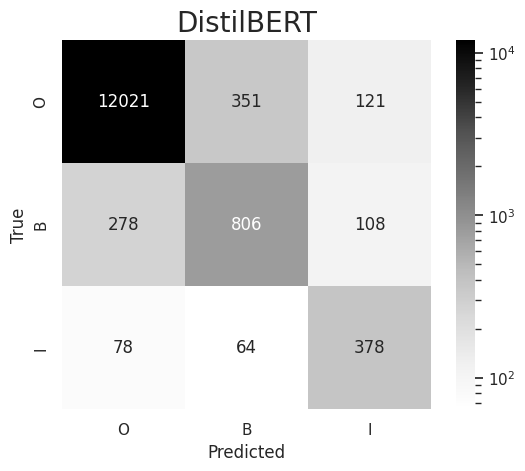

In [ ]:



from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme(style='white')
from matplotlib.colors import LogNorm, Normalize
cm = metrics.confusion_matrix(gold, preds, labels=[0,1,2])
sns.heatmap(cm, cmap='Greys',annot=True,fmt='d',square=True, norm=LogNorm(), yticklabels = ['O','B','I'], xticklabels=['O','B','I']);

plt.xlabel('Predicted')
plt.ylabel('True')

plt.title("DistilBERT", fontsize =20)
plt.savefig('DistilBERTv3.pdf',dpi=200)
plt.show()

In [ ]:
cm

array([[12021,   351,   121],
       [  278,   806,   108],
       [   78,    64,   378]])

In [ ]:
gold_binary = [1 if i==2 else i for i in gold]
preds_binary = [1 if i==2 else i for i in preds]

report = metrics.confusion_matrix(gold_binary, preds_binary,labels=[0,1])
df_je = pd.DataFrame(report).transpose()
print(df_je)
print()
report = classification_report(gold, preds, output_dict=True)
df = pd.DataFrame(report).transpose()
print(df)


cm = metrics.confusion_matrix(gold_binary, preds_binary, labels=[0,1])
plt.title("distilBERT_3epoch_BINARY", fontsize =20)
sns.heatmap(cm, annot=True,fmt='d',square=True, norm=LogNorm(),cmap = "Blues").set(xlabel='Predicted Label', ylabel='True Label');

plt.show()

       0     1
0  12021   356
1    472  1356



NameError: ignored

In [ ]:
for index, label in enumerate(gold):
    if label == 2:
        gold[index] = 1

In [ ]:
report = classification_report(gold, preds, output_dict=True)
df = pd.DataFrame(report).transpose()
print(df)

In [ ]:
test.labels.tolist()[0]

In [ ]:
final_list_labels[0]

In [ ]:
gold = 2
pred = 1
gold2_pred1 = []

for sent_index_labels,list_of_gold_labels in enumerate(test.labels.to_list()):
    # print(sent_index_labels)
    if test.labels.to_list()[sent_index_labels] != final_list_labels[sent_index_labels]:
        for token_index, token in enumerate(final_list_labels[sent_index_labels]):
            if (token == pred and test.labels.to_list()[sent_index_labels][token_index]==gold):
                #print(test.tokens.iloc[sent_index_labels])
                #print(f'gold: {list(zip(test.tokens.to_list()[sent_index_labels], test.labels.to_list()[sent_index_labels]))}')
                #print(f'preds: {list(zip(test.tokens.to_list()[sent_index_labels],final_list_labels[sent_index_labels]))}')
            # print(f'gold:  {test.labels.to_list()[sent_index_labels]} ')
                # print(f'pred:  {final_list_labels[sent_index_labels]}')
                gold2_pred1.append(sent_index_labels)
    # if list_of_gold_labels != final_list_labels[sent_index_labels]:
    #     print(final_list_tokens[sent_index])

len(gold2_pred1)

In [ ]:
gold = 1
pred = 2
gold1_pred2 = []

for sent_index_labels,list_of_gold_labels in enumerate(test.labels.to_list()):
    # print(sent_index_labels)
    if test.labels.to_list()[sent_index_labels] != final_list_labels[sent_index_labels]:
        for token_index, token in enumerate(final_list_labels[sent_index_labels]):
            if (token == pred and test.labels.to_list()[sent_index_labels][token_index]==gold):
                #print(test.tokens.iloc[sent_index_labels])
                #print(f'gold: {list(zip(test.tokens.to_list()[sent_index_labels], test.labels.to_list()[sent_index_labels]))}')
                #print(f'preds: {list(zip(test.tokens.to_list()[sent_index_labels],final_list_labels[sent_index_labels]))}')
            # print(f'gold:  {test.labels.to_list()[sent_index_labels]} ')
                # print(f'pred:  {final_list_labels[sent_index_labels]}')
                gold1_pred2.append(sent_index_labels)
    # if list_of_gold_labels != final_list_labels[sent_index_labels]:
    #     print(final_list_tokens[sent_index])

len(gold1_pred2)

In [ ]:
cm = metrics.confusion_matrix(gold, preds, labels=[0,1,2])
plt.title("DistilBERT", fontsize =20)
sns.heatmap(cm, cmap='Greys',annot=True,fmt='d',square=True, norm=LogNorm()).set(xlabel='Predicted Label', ylabel='True Label');
plt.savefig('distilBERT.pdf',dpi=200)

plt.show()

NameError: ignored